PROJECT VALUATION ANALYSIS

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#load the dataset
data = pd.read_csv("C:\\Users\\DELL\\Downloads\\unicorns till sep 2022.csv")

In [3]:
#show the first few rows of the dataset
data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [5]:
#total number of rows and columns
print("Total number of rows and columns:", data.shape)

Total number of rows and columns: (1186, 7)


In [6]:
#handling missing values
data.isnull().sum()

Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
dtype: int64

ONLY 18 NULL VALUES OUT OF 1186 ROWS. THEREFORE, HERE WE GONNA DELETE THOSE NULL VALUES

In [7]:
#removing all rows with missing values
data = data.dropna()
data.shape

(1168, 7)

In [8]:
#showing basic statistics of the dataset
data.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
count,1168,1168,1168,1168,1168,1168,1168
unique,1165,221,692,46,280,17,1152
top,Branch,$1,7/13/2021,United States,San Francisco,Fintech,Sequoia Capital
freq,2,262,8,636,168,239,3


FEATURE ENGINEERING

In [9]:
data['Valuation ($B)'] = data['Valuation ($B)'].str.replace('$', '', regex=False).astype(float)
data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [10]:
data['Date Joined'] = pd.to_datetime(data['Date Joined'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         1168 non-null   object        
 1   Valuation ($B)  1168 non-null   float64       
 2   Date Joined     1168 non-null   datetime64[ns]
 3   Country         1168 non-null   object        
 4   City            1168 non-null   object        
 5   Industry        1168 non-null   object        
 6   Investors       1168 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 73.0+ KB


In [12]:
print(data['Industry'].value_counts())

Industry
Fintech                                239
Internet software & services           224
E-commerce & direct-to-consumer        103
Health                                  94
Artificial intelligence                 74
Supply chain, logistics, & delivery     65
Other                                   65
Cybersecurity                           58
Data management & analytics             45
Auto & transportation                   40
Hardware                                38
Mobile & telecommunications             36
Edtech                                  32
Consumer & retail                       28
Travel                                  14
Artificial Intelligence                 11
Internet                                 2
Name: count, dtype: int64


Hence,There are two kind of letter cases of  Artificial intelligence in the industry feature , so i'm gonna make both same  

In [13]:
data['Industry'] = data['Industry'].replace({'Artificial intelligence': 'Artificial Intelligence'})

In [14]:
print(list(data['Company'].unique()))

['ByteDance', 'SpaceX', 'SHEIN', 'Stripe', 'Canva', 'Checkout.com', 'Instacart', 'Databricks', 'Revolut', 'Epic Games', 'Fanatics', 'Chime', "BYJU's", 'Xiaohongshu', 'J&T Express', 'Miro', 'Yuanfudao', 'DJI Innovations', 'Discord', 'goPuff', 'Yuanqi Senlin', 'Ripple', 'Blockchain.com', 'Plaid', 'OpenSea', 'Celonis', 'Grammarly', 'Devoted Health', 'Faire', 'Brex', 'JUUL Labs', 'Bitmain Technologies', 'Biosplice Therapeutics', 'GoodLeap', 'Xingsheng Selected', 'Deel', 'Getir', 'Airtable', 'ZongMu Technology', 'Rippling', 'Global Switch', 'Bolt', 'Alchemy', 'Weilong', 'Swiggy', 'Lalamove', 'Figma', 'Gusto', 'Chehaoduo', 'reddit', 'Talkdesk', 'Notion Labs', 'Thrasio', 'Digital Currency Group', 'KuCoin', 'OutSystems', 'ServiceTitan', 'HEYTEA', 'N26', 'Klaviyo', 'Northvolt', 'Tanium', 'Niantic', 'OYO Rooms', 'Rapyd', 'Kavak', 'Snyk', 'Nuro', 'Chainalysis', 'Pony.ai', 'Personio', 'SumUp', 'Lacework', 'Tipalti', 'Tempus', 'Ramp', 'Dream11', 'Fireblocks', 'Flexport', 'FalconX', 'Caris Life Scie

A lots of unique companies

In [15]:
print(data['Investors'].value_counts())

Investors
Sequoia Capital                                                     3
Qualcomm Ventures, Accel, Canaan Partners                           2
Insight Partners, Sequoia Capital, Index Ventures                   2
Sequoia Capital China, Qiming Venture Partners, Tencent Holdings    2
Tiger Global Management, Sequoia Capital India, Ribbit Capital      2
                                                                   ..
New Enterprise Associates, Tull Investment Group, Silver Lake       1
Emergence Capital, Slack Fund, PayPal Ventures                      1
iSeed Ventures, Point Nine Capital, Buckley Ventures                1
Creades, EQT Ventures, Verdane Capital                              1
Battery Ventures, Adams Street Partners, Coatue Management          1
Name: count, Length: 1152, dtype: int64


EDA

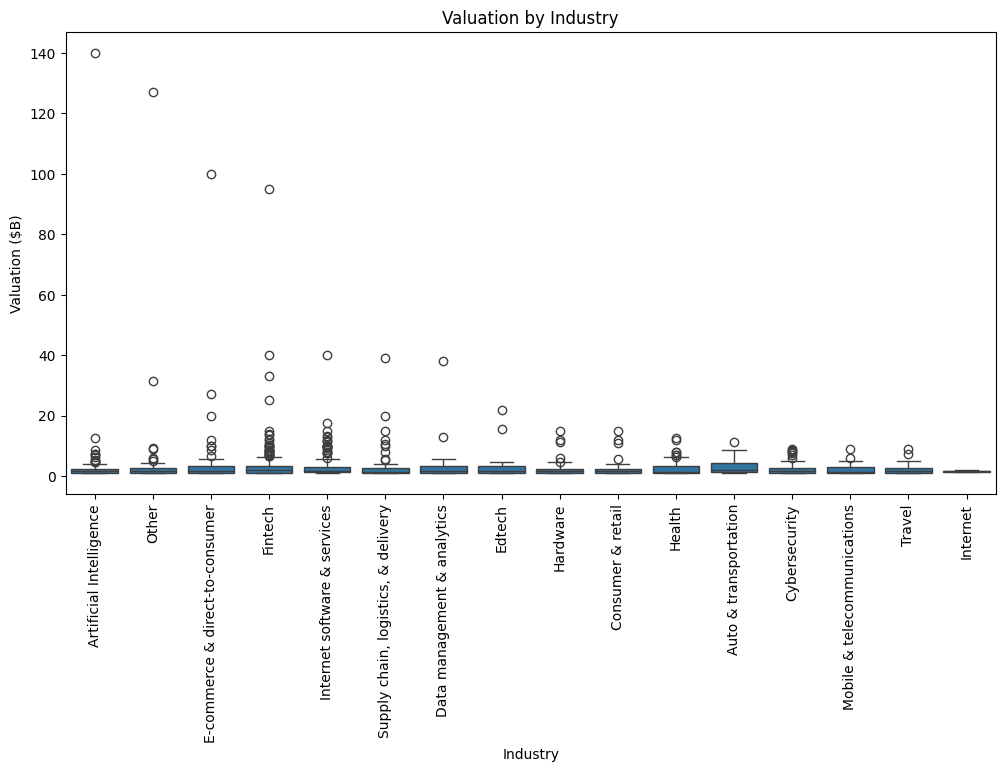

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Valuation ($B)', data=data)
plt.xticks(rotation=90)
plt.title('Valuation by Industry')
plt.show()

In [17]:
#visualizing the distribution of the target variables with tilted x-axis labels
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

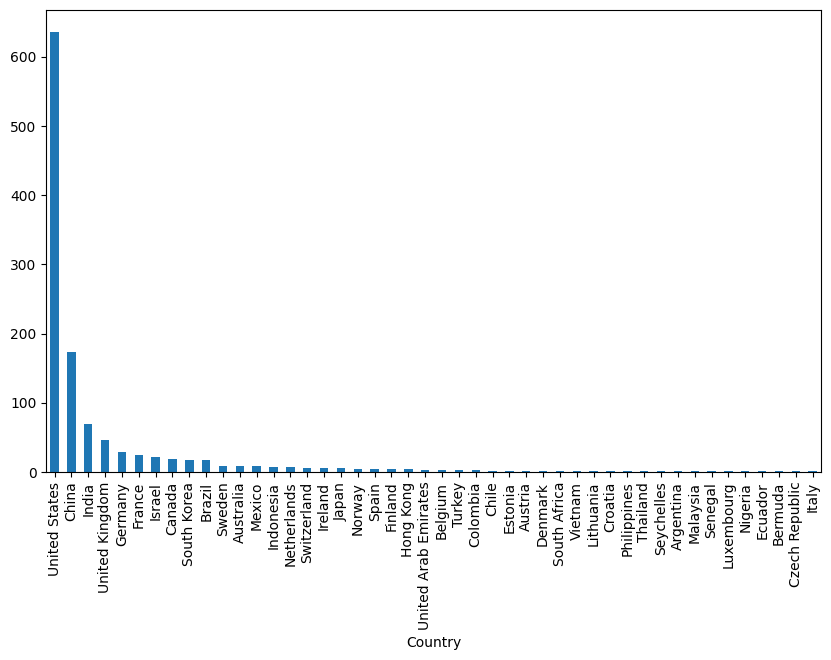

In [18]:
plt.figure(figsize=(10, 6))
data['Country'].value_counts().plot(kind='bar')
plt.show()

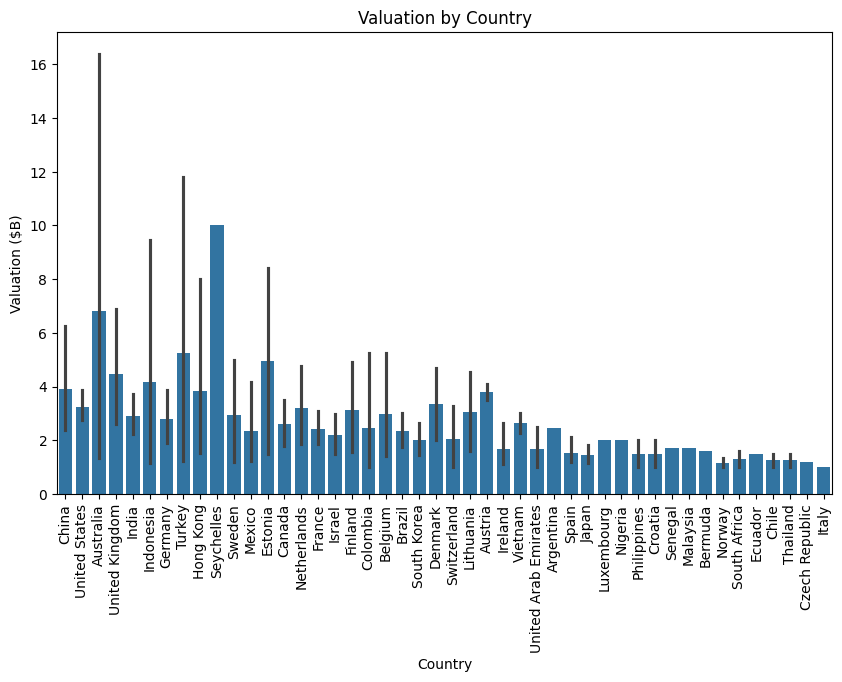

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Valuation ($B)', data=data)
plt.xlabel('Country')
plt.ylabel('Valuation ($B)')    
plt.title('Valuation by Country')
plt.xticks(rotation=90)
plt.show()

SEYCHELLES is the country with the most valuation and ITALY with the least , both country has no outliers in valuation 

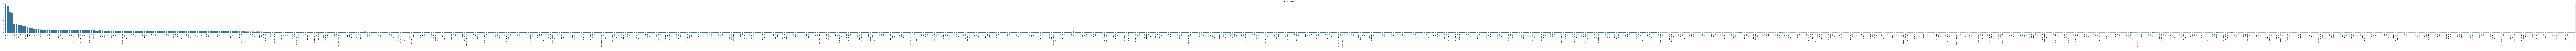

In [20]:
plt.figure(figsize=(500, 6))
sns.barplot(x='Company', y='Valuation ($B)', data=data)
plt.xlabel('Country')
plt.ylabel('Valuation ($B)')    
plt.title('Valuation by Country')
plt.xticks(rotation=90)
plt.show()

According to the dataset ,Top 3 Companies with most valuation are ByteDance, Spacex, Shein . These companies crossed valuation over $100 . 


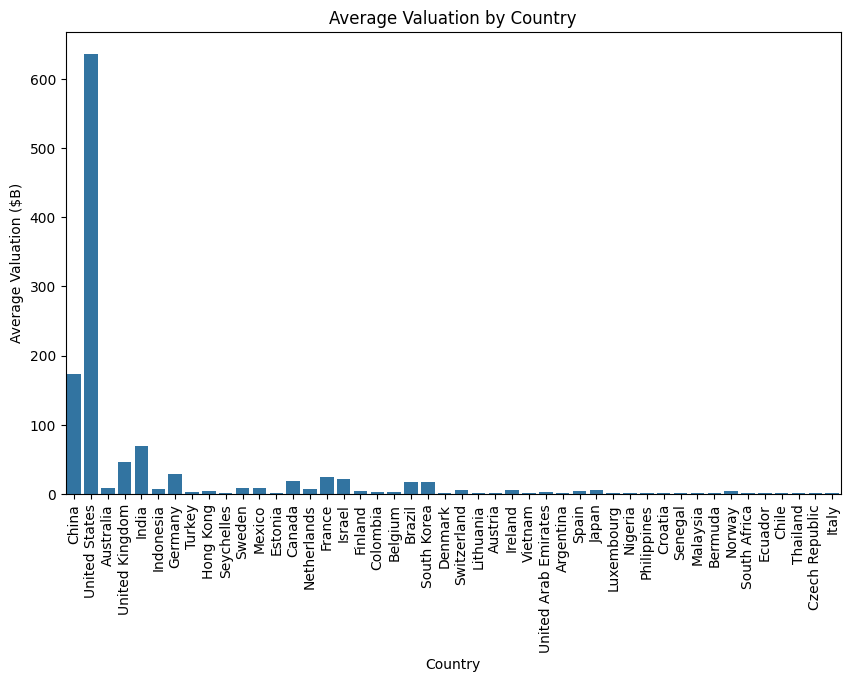

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Valuation ($B)', data=data, estimator=np.count_nonzero, )
plt.xlabel('Country')
plt.ylabel('Average Valuation ($B)')
plt.title('Average Valuation by Country')
plt.xticks(rotation=90)
plt.show()

 Country with the most average valuation is UNITED STATES

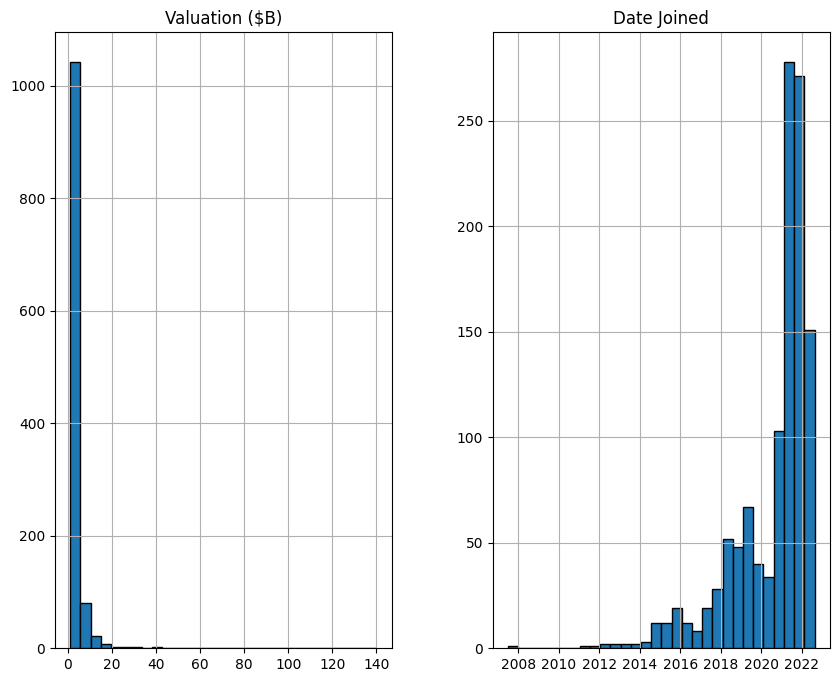

In [22]:
data.hist(figsize=(10, 8), bins=30, edgecolor='black')
plt.show()